# Task-2 (Linear Regression using Python)

# To Explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.
Data can be found at http://bit.ly/w-data

What will be predicted score if a student study for 9.25 hrs in a
day?

# Importing all libraries

In [7]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Reading data

In [8]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
# Are there any missing value?
data.isna().sum()

Hours     0
Scores    0
dtype: int64

# Plotting the distribution of scores

In [12]:
data.shape

(25, 2)

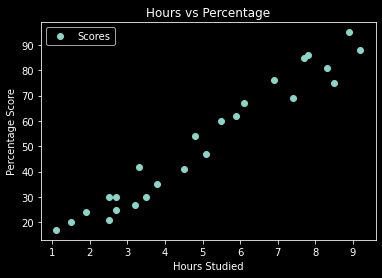

In [13]:
from matplotlib import style
style.use('dark_background')
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


From the graph we can find the linear relation between the number of hours studied by the student and the percentage of score.

# Preparing the data

In [14]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [15]:
# split data into train and tests sets
from sklearn.model_selection import train_test_split

# split into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,
                                              y,
                                              test_size=0.2,
                                              random_state=0)

# Training the algorithm

After splitting up ofdata into training and test set we are going to train it.

In [16]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 

print("Training is done.")

Training is done.


We have imported linear regression class, created an object of that class,which is the linear regression model.

Then used the fit method to “fit” the model to our dataset. What this does is nothing but make the regressor “study” our data and “learn” from it.

# Visualization

First, we make use of a scatter plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.

For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

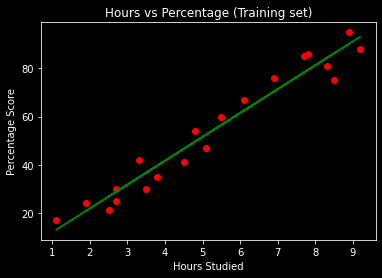

In [30]:
#plotting the regression line
line= lr.coef_*x+lr.intercept_

plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")

plt.title('Hours vs Percentage (Training set)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Making predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [31]:
y_pred = lr.predict(x_test)

In [19]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [33]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


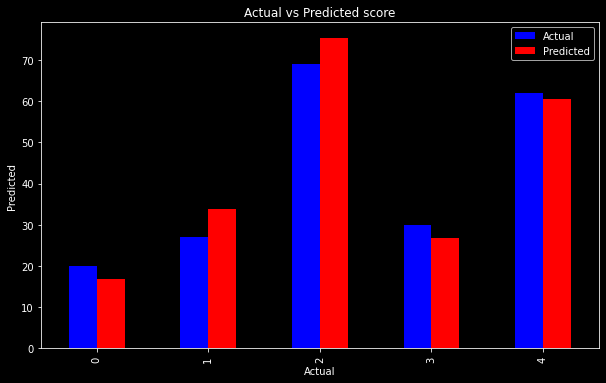

In [21]:
df.plot(kind='bar', figsize=(10,6), color=["blue", "red"])
plt.title('Actual vs Predicted score')  
plt.xlabel('Actual')  
plt.ylabel('Predicted')  
plt.legend(["Actual", "Predicted"])
plt.show()

In [63]:
# You can also test with your own data
#hours = 9.25
own_pred = lr.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model

In [66]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
